# UK Housing EDA

This project will analyse UK housing prices in relation to other data such as mortgages, wages, inflation, to draw insights on how difficult it is to buy a home in the UK, why this is the case, and how mortgages relate to this.

I will perform an exploratory data analysis (EDA) on the data using the tools in my tech stack below. I will utilise basic statistics, data munging, and visualisation techniques to achieve the project's goals.

### Tech Stack

- SQL
- Python (Pandas, Matplotlib, Seaborn) (see requirements.txt for details)
- Tableau

### Loading in packages:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, reading in CSV, dataframes
import matplotlib.pyplot as plt # visualisation tool
import seaborn as sns # visualisation tool

### Read in data into a Pandas dataframe:

In [3]:
df_housing = pd.read_csv('datasets/UK-HPI-full-file-2023-11.csv')
df_housing.head(10) # show first 10 rows of dataframe

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0
5,01/06/2004,Aberdeenshire,S12000034,89267.61305,44.652797,NaN,3.342974,NaN,NaN,525.0,...,94964.60319,43.239827,3.234539,NaN,164.0,89139.77924,44.967382,3.383150,NaN,361.0
6,01/07/2004,Aberdeenshire,S12000034,93047.50105,46.543545,NaN,4.234333,NaN,NaN,652.0,...,98682.59954,44.932726,3.915139,NaN,163.0,93022.86929,46.926242,4.356181,NaN,489.0
7,01/08/2004,Aberdeenshire,S12000034,97790.66757,48.916137,NaN,5.097575,NaN,NaN,512.0,...,103223.74280,47.000426,4.601767,NaN,130.0,97937.62146,49.405534,5.283381,NaN,382.0
8,01/09/2004,Aberdeenshire,S12000034,98663.95545,49.352967,NaN,0.893018,NaN,NaN,497.0,...,103855.90760,47.288267,0.612422,NaN,142.0,98913.87933,49.898016,0.996816,NaN,355.0
9,01/10/2004,Aberdeenshire,S12000034,99083.88349,49.563020,NaN,0.425614,NaN,NaN,590.0,...,104867.86010,47.749035,0.974381,NaN,164.0,99131.45382,50.007774,0.219964,NaN,426.0


This data looks useful to my project. It is open data from the UK government website, so the integrity should be high. It is broken down by area in the UK and by month. It already includes an average price by area.

### Examining the data:

Here I will use various Pandas methods to explore the data a bit more.

In [61]:
df_housing.shape

(138960, 54)

In [62]:
df_housing.describe()

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
count,1.389600e+05,138960.000000,4869.000000,138536.000000,134148.000000,4869.000000,134493.000000,1.324590e+05,132459.000000,132069.000000,...,1.317420e+05,131946.000000,131555.000000,127278.000000,129693.000000,1.320180e+05,132018.000000,131627.000000,127350.000000,132004.000000
mean,1.761369e+05,84.776851,87.370473,0.557377,6.522500,165182.040164,1251.893994,3.135082e+05,86.595317,0.501459,...,2.115912e+05,87.173995,0.555949,6.873363,130.996147,1.777623e+05,85.294770,0.501276,6.475815,1138.759462
std,1.205824e+05,37.600606,34.695546,1.967498,8.771711,87056.033100,7689.400051,2.773725e+05,36.441588,1.723749,...,1.272844e+05,37.957052,1.803121,8.203071,820.427135,1.196736e+05,35.643878,1.750978,8.513894,6971.602084
min,2.712016e+03,1.096815,18.312610,-30.297781,-35.786566,40405.313840,2.000000,4.064610e+04,12.494361,-19.628465,...,2.722990e+04,9.708894,-29.816368,-28.851244,0.000000,2.278638e+04,10.097461,-30.587732,-30.341125,2.000000
25%,9.874998e+04,49.855080,62.079770,-0.435076,1.464248,114782.551900,141.000000,1.705557e+05,55.608093,-0.445629,...,1.272426e+05,55.095452,-0.442578,2.117844,9.000000,1.015668e+05,53.185331,-0.441600,1.457919,127.000000
50%,1.522365e+05,90.673736,92.249684,0.513292,5.609383,154282.978800,217.000000,2.467760e+05,90.137270,0.493767,...,1.898615e+05,90.454024,0.543022,6.123600,20.000000,1.530347e+05,90.828792,0.492317,5.585164,195.000000
75%,2.214988e+05,111.037213,111.764515,1.493096,10.680839,205071.351400,382.000000,3.667581e+05,110.998043,1.454074,...,2.646191e+05,112.335772,1.548598,11.267134,45.000000,2.215915e+05,110.223709,1.441229,10.608508,346.000000
max,1.517127e+06,221.485238,161.600000,35.286646,98.437940,535673.000000,165290.000000,4.509763e+06,201.600000,34.812357,...,1.322861e+06,215.100000,34.946588,96.170727,21097.333330,1.527358e+06,207.478740,35.552952,98.648458,156074.000000


In [7]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138960 entries, 0 to 138959
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    138960 non-null  object 
 1   RegionName              138960 non-null  object 
 2   AreaCode                138960 non-null  object 
 3   AveragePrice            138960 non-null  float64
 4   Index                   138960 non-null  float64
 5   IndexSA                 4869 non-null    float64
 6   1m%Change               138536 non-null  float64
 7   12m%Change              134148 non-null  float64
 8   AveragePriceSA          4869 non-null    float64
 9   SalesVolume             134493 non-null  float64
 10  DetachedPrice           132459 non-null  float64
 11  DetachedIndex           132459 non-null  float64
 12  Detached1m%Change       132069 non-null  float64
 13  Detached12m%Change      127803 non-null  float64
 14  SemiDetachedPrice   

There are 138,959 rows in the dataset. The main columns I am interested in are Date, RegionName, and AveragePrice. The non-null count for these match the total rows, so there are no missing data points, passing a first data validation check.

In [11]:
df_housing.corr(numeric_only=True)

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
AveragePrice,1.000000,0.548822,0.710931,-0.073050,-0.110827,0.999808,-0.006306,0.941354,0.547309,-0.037216,...,0.952643,0.533673,-0.022121,-0.083365,-0.012380,0.999023,0.534771,-0.044149,-0.102832,-0.006533
Index,0.548822,1.000000,0.999593,-0.109722,-0.199778,0.701478,0.002416,0.387239,0.997489,-0.068849,...,0.637799,0.995246,-0.039996,-0.154187,-0.001541,0.527396,0.999930,-0.078979,-0.194277,0.005804
IndexSA,0.710931,0.999593,1.000000,-0.113018,-0.184074,0.707411,0.017547,0.623790,0.997312,-0.087501,...,0.820361,0.994358,-0.032467,-0.159419,-0.037396,0.700964,0.999513,-0.103804,-0.219603,0.021882
1m%Change,-0.073050,-0.109722,-0.113018,1.000000,0.419318,-0.079957,0.011799,-0.035931,-0.077625,0.973247,...,-0.051063,-0.075943,0.898554,0.356584,0.008040,-0.042679,-0.077820,0.998517,0.372551,0.013001
12m%Change,-0.110827,-0.199778,-0.184074,0.419318,1.000000,-0.119898,0.015218,-0.076262,-0.182976,0.350934,...,-0.119922,-0.184924,0.350116,0.956460,0.006290,-0.099596,-0.191837,0.369548,0.999421,0.015449
AveragePriceSA,0.999808,0.701478,0.707411,-0.079957,-0.119898,1.000000,0.080269,0.981749,0.714902,-0.060740,...,0.976415,0.690260,-0.021614,-0.100311,0.028323,0.999720,0.701567,-0.070387,-0.139510,0.084345
SalesVolume,-0.006306,0.002416,0.017547,0.011799,0.015218,0.080269,1.000000,-0.015966,0.007351,0.010656,...,-0.001877,0.002950,0.006621,0.012280,0.958855,-0.007353,0.005331,0.013129,0.015429,0.999451
DetachedPrice,0.941354,0.387239,0.623790,-0.035931,-0.076262,0.981749,-0.015966,1.000000,0.394406,-0.025003,...,0.866581,0.385704,-0.015638,-0.057919,-0.020194,0.943756,0.386065,-0.033655,-0.072770,-0.015337
DetachedIndex,0.547309,0.997489,0.997312,-0.077625,-0.182976,0.714902,0.007351,0.394406,1.000000,-0.062875,...,0.650242,0.995870,-0.031664,-0.132740,-0.000045,0.537857,0.997211,-0.075296,-0.178725,0.008095
Detached1m%Change,-0.037216,-0.068849,-0.087501,0.973247,0.350934,-0.060740,0.010656,-0.025003,-0.062875,1.000000,...,-0.040315,-0.064725,0.871062,0.334352,0.001726,-0.031934,-0.065987,0.971906,0.349718,0.011661


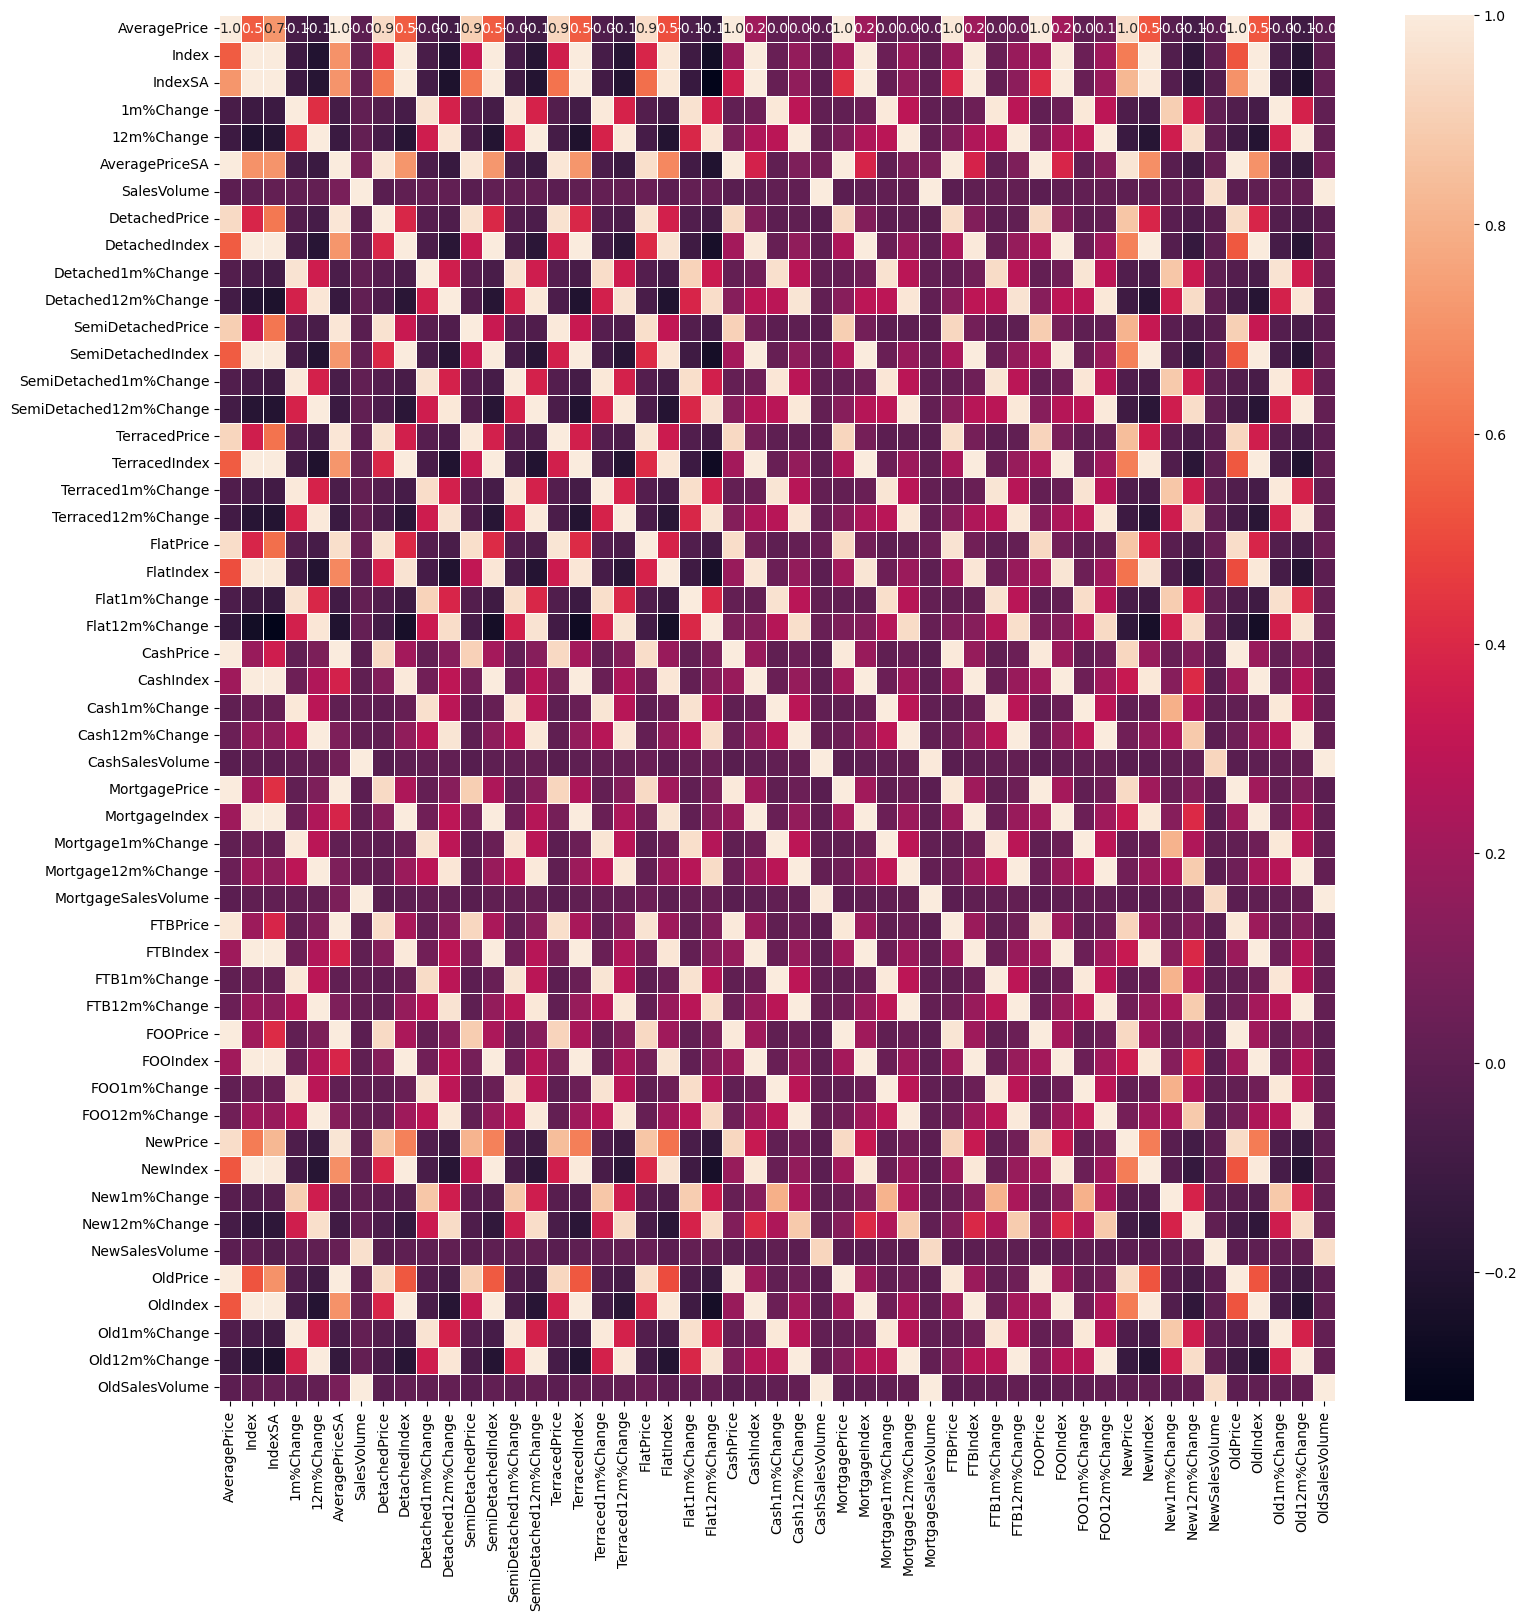

In [60]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_housing.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [14]:
df_housing.columns

Index(['Date', 'RegionName', 'AreaCode', 'AveragePrice', 'Index', 'IndexSA',
       '1m%Change', '12m%Change', 'AveragePriceSA', 'SalesVolume',
       'DetachedPrice', 'DetachedIndex', 'Detached1m%Change',
       'Detached12m%Change', 'SemiDetachedPrice', 'SemiDetachedIndex',
       'SemiDetached1m%Change', 'SemiDetached12m%Change', 'TerracedPrice',
       'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change', 'FlatPrice',
       'FlatIndex', 'Flat1m%Change', 'Flat12m%Change', 'CashPrice',
       'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume',
       'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change',
       'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex',
       'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change',
       'FOO12m%Change', 'NewPrice', 'NewIndex', 'New1m%Change',
       'New12m%Change', 'NewSalesVolume', 'OldPrice', 'OldIndex',
       'Old1m%Change', 'Old12m%Change', 'OldSalesVolume'],
      dtype='object

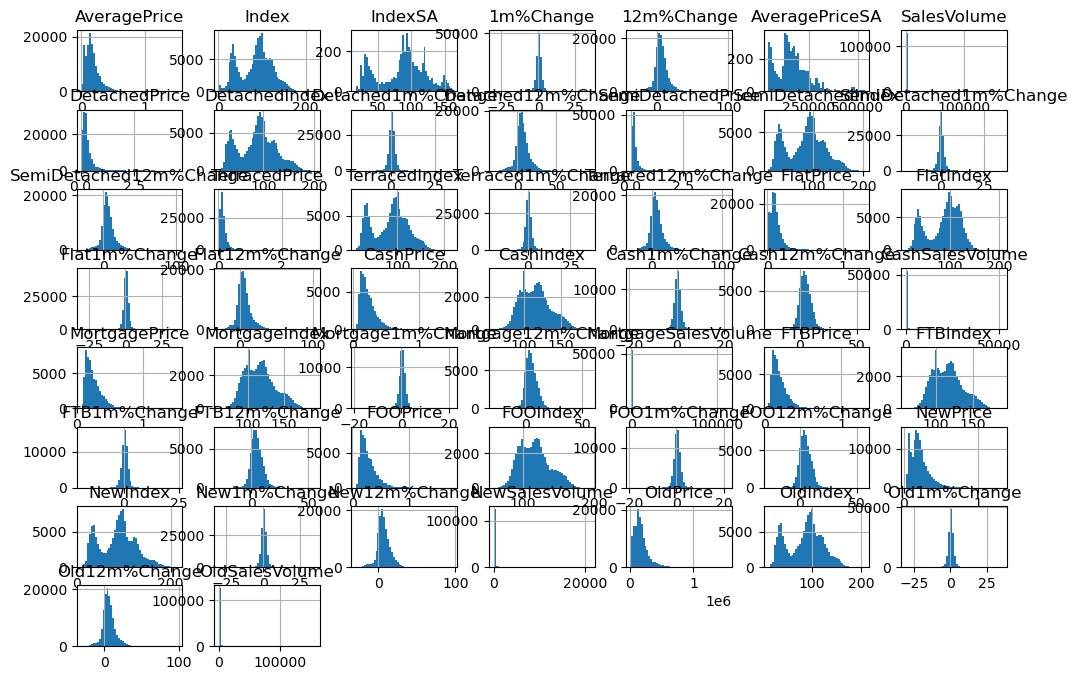

In [15]:
# Quick overview of data using histograms
df_housing.hist(bins=50, figsize=(12, 8))
plt.show()

### Taking closer look:

I want to quickly visualise the average housing price across time, with a line plot for each region in the UK. I need to find out:

1. What regions are included in the data
2. What the time span of the data is

In [66]:
len(df_housing['RegionName'].unique())

405

Dataset contains 405 different regions. Let's see what they are:

In [67]:
df_housing['RegionName'].unique()

array(['Aberdeenshire', 'Adur', 'Amber Valley', 'Angus',
       'Antrim and Newtownabbey', 'Ards and North Down',
       'Argyll and Bute', 'Armagh City Banbridge and Craigavon', 'Arun',
       'Ashfield', 'Ashford', 'Babergh', 'Barking and Dagenham', 'Barnet',
       'Barnsley', 'Basildon', 'Basingstoke and Deane', 'Bassetlaw',
       'Bath and North East Somerset', 'Bedford', 'Belfast', 'Bexley',
       'Birmingham', 'Blaby', 'Blackburn with Darwen', 'Blackpool',
       'Blaenau Gwent', 'Bolsover', 'Bolton', 'Boston',
       'Bournemouth Christchurch and Poole', 'Bracknell Forest',
       'Bradford', 'Braintree', 'Breckland', 'Brent', 'Brentwood',
       'Bridgend', 'Brighton and Hove', 'Broadland', 'Bromley',
       'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Buckinghamshire',
       'Burnley', 'Bury', 'Caerphilly', 'Calderdale', 'Cambridge',
       'Cambridgeshire', 'Camden', 'Cannock Chase', 'Canterbury',
       'Cardiff', 'Carmarthenshire', 'Castle Point',
       'Causeway Coast and

In [20]:
# See all rows
pd.set_option("display.max_rows", None)

# Count Regions
df_housing['RegionName'].value_counts()

RegionName
Yorkshire and The Humber               668
West Midlands Region                   668
Wales                                  668
East Midlands                          668
Scotland                               668
South West                             668
United Kingdom                         668
London                                 668
Northern Ireland                       668
England                                668
North East                             380
South East                             380
East of England                        380
Redditch                               347
Preston                                347
Reigate and Banstead                   347
Redcar and Cleveland                   347
Redbridge                              347
Reading                                347
Portsmouth                             347
Powys                                  347
Ribble Valley                          347
Pendle                                 347


The regions with the most data (668 entries) are at the top of the list. It would be good to see the UK average, along with breakdowns for Scotland, England, Northern Ireland, and Wales. I am not so interested in specific areas of England so I will not focus on them. There does not appear to be any duplicates or typos, but I will return to data cleaning in more detail once I have decided exactly what datasets I am using for the project.

Now let's convert the Date column to datetime so we can accurately see the time span of the data:

In [6]:
df_housing['Date'] = pd.to_datetime(df_housing['Date'])
df_housing['Date'].min()

Timestamp('1968-01-04 00:00:00')

In [7]:
df_housing['Date'].max()

Timestamp('2023-01-11 00:00:00')

Now we can see the data spans from April 1968 to November 2023. This is perfect as I wanted to find data between 1945-2024. And I wanted to focus on data over 1 generation (30 years). So I can gather this range from this dataset.

### Data Munging

In order to make my first visualisation I will drop all the columns except from Date, RegionName, and AveragePrice. I will then separate by regions UK, Scotland, England, Northern Ireland, and Wales. Pandas makes this easy to do.

In [8]:
df_housing_uk = df_housing.loc[(df_housing['RegionName'] == 'United Kingdom')] # Filter by region = UK and create new df
df_housing_uk = df_housing_uk[['Date', 'AveragePrice']] # drop all columns except the 2 we need
df_housing_uk = df_housing_uk.reset_index(drop=True) # reset index to 0
df_housing_uk.info() # take a look to make sure 668 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          668 non-null    datetime64[ns]
 1   AveragePrice  668 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.6 KB


I will now repeat these steps for the rest of the regions I want for my visualisation.

In [9]:
df_housing_scotland = df_housing.loc[(df_housing['RegionName'] == 'Scotland')]
df_housing_scotland = df_housing_scotland[['Date', 'AveragePrice']]
df_housing_scotland = df_housing_scotland.reset_index(drop=True)
df_housing_scotland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          668 non-null    datetime64[ns]
 1   AveragePrice  668 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.6 KB


In [10]:
df_housing_england = df_housing.loc[(df_housing['RegionName'] == 'England')]
df_housing_england = df_housing_england[['Date', 'AveragePrice']]
df_housing_england = df_housing_england.reset_index(drop=True)
df_housing_england.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          668 non-null    datetime64[ns]
 1   AveragePrice  668 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.6 KB


In [11]:
df_housing_ni = df_housing.loc[(df_housing['RegionName'] == 'Northern Ireland')]
df_housing_ni = df_housing_ni[['Date', 'AveragePrice']]
df_housing_ni = df_housing_ni.reset_index(drop=True)
df_housing_ni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          668 non-null    datetime64[ns]
 1   AveragePrice  668 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.6 KB


In [12]:
df_housing_wales = df_housing.loc[(df_housing['RegionName'] == 'Wales')]
df_housing_wales = df_housing_wales[['Date', 'AveragePrice']]
df_housing_wales = df_housing_wales.reset_index(drop=True)
df_housing_wales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          668 non-null    datetime64[ns]
 1   AveragePrice  668 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.6 KB


### Visualising the data

I now have 5 dataframes, let's make a line plot and see what the data looks like. This will show the average housing price from 1968 to 2003 separated by 4 regions and also show the total UK average. Line plot works best when the x-axis is time. I will start the y-axis at 0 so the scale of the increase is reflected accurately.

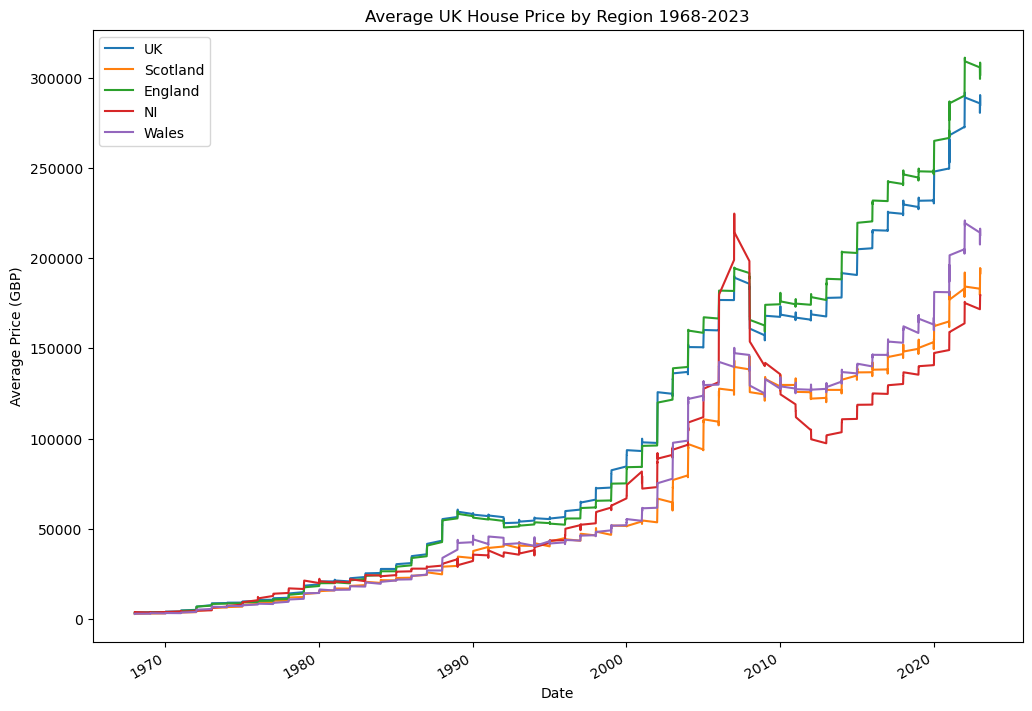

In [13]:
# Line Plot
plt.rcParams['figure.figsize'] = [12, 9] # increase default plot size
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = style of line
ax = df_housing_uk.plot('Date', 'AveragePrice', label='UK')
df_housing_scotland.plot('Date', 'AveragePrice', label='Scotland', ax=ax)
df_housing_england.plot('Date', 'AveragePrice', label='England', ax=ax)
df_housing_ni.plot('Date', 'AveragePrice', label='NI', ax=ax)
df_housing_wales.plot('Date', 'AveragePrice', label='Wales', ax=ax)
plt.xlabel('Date') # label = name of label
plt.ylabel('Average Price (GBP)')
plt.title('Average UK House Price by Region 1968-2023') # title = title of plot
plt.show()

First of all we can clearly see the average house price has shot up dramatically from 1968. The graph shows big booms around 1989 and 2008, followed by a crash. The 2008 crash is the most remarkable. We can see that house prices are highest in England, now sitting at around 300k. The average is around 280k, followed by Wales at 210k, Scotland 190k, and NI at 180k. The most interesting thing I noticed is that NI prices rocketed to the highest in the UK in 2008, but then crashed to the lowest in the UK by 2012, remaining the lowest from then till today.

### More datasets

This graph clearly shows an increase in house price in the UK. But we need to answer if it is more difficult to purchase a house. In order to answer this question we need to give the data more context. I will do this by comparing it to the median UK wage.

I have an excel file from The Office of National Statistics showing percentiles of weekly wages in the UK 1968-2023. I aggregated and cleaned the data in excel before exporting to a csv file for import into pandas df. See changelog.docx for more information, but I basically calculated the annual salary, averaged by male and female, and took the median to use for my analysis.

In [14]:
df_wages = pd.read_csv('datasets/uk_median_wages_cleaned.csv') # import median wages
df_wages['Date'] = pd.to_datetime(df_wages['Date'], format='%Y') # convert date to datetime format
df_wages.head() # preview

,Date,Median Wage,Unnamed: 2,Unnamed: 3
0,1968-01-01,938.6,NaN,NaN
1,1970-01-01,1086.8,NaN,NaN
2,1971-01-01,1206.4,NaN,NaN
3,1972-01-01,1352.0,NaN,NaN
4,1973-01-01,1536.6,NaN,NaN


Now I'll plot this against the UK average house price:

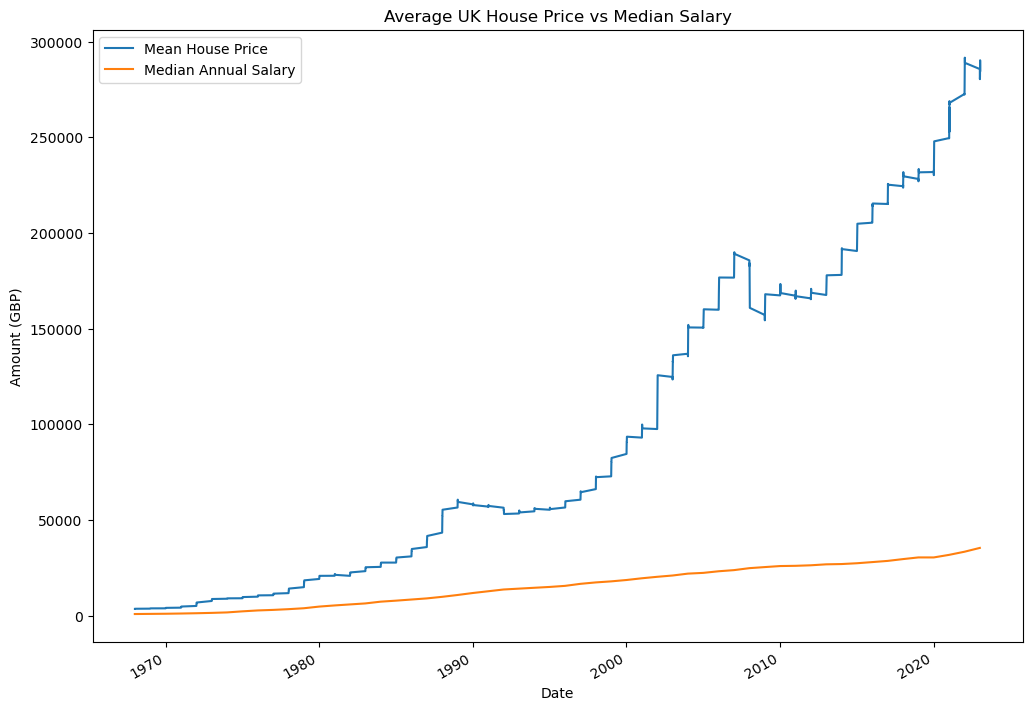

In [15]:
ax = df_housing_uk.plot('Date', 'AveragePrice', label='Mean House Price')
df_wages.plot('Date', 'Median Wage', label='Median Annual Salary', ax=ax)
plt.xlabel('Date') # label = name of label
plt.ylabel('Amount (GBP)')
plt.title('Average UK House Price vs Median Salary') # title = title of plot
plt.show()

Once visualising it clearly shows a massive increase of the cost of a home compared to the annual salary. This is compelling data to argue that the difficulty of buying a home has increased. A reader can clearly see the rate of growth of wages is nowhere near the rate of growth for housing value.

Contains HM Land Registry data © Crown copyright and database right 2020. This data is licensed under the Open Government Licence v3.0.